In [10]:
%matplotlib notebook
from ipywidgets import interact
from src.experiments import bargaining_gap_experiment

import matplotlib.pyplot as plt

# 1. Bargaining gap plots

In [2]:
bg_exp = bargaining_gap_experiment.BargainingGapExperiment()
bg_data = bg_exp.load_experiment()

In [4]:
r_data = bg_data.groupby(['utility_type', 'mix_param', 'scale_param', 'goods_num']).mean()

<IPython.core.display.Javascript object>


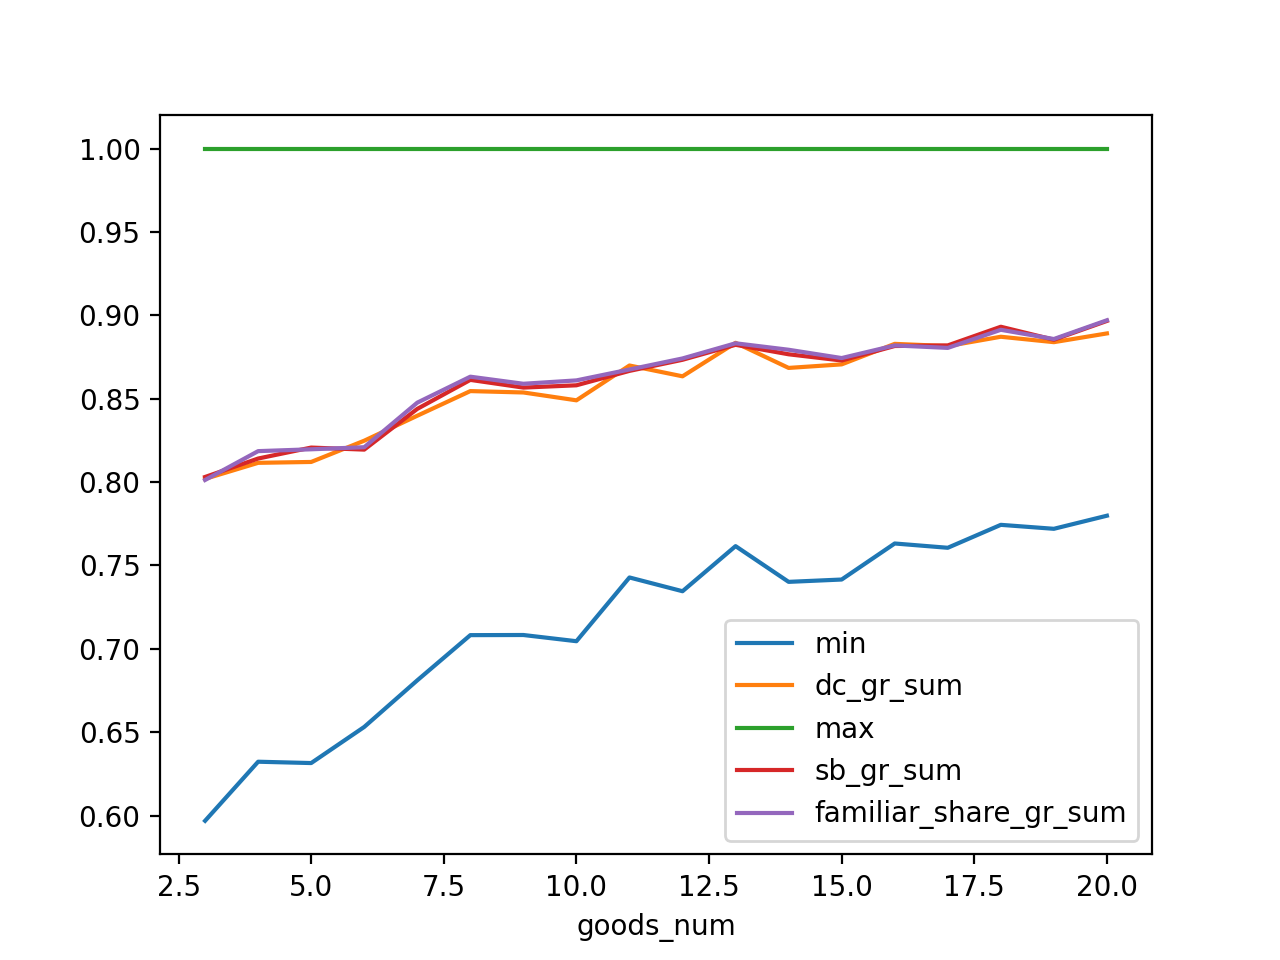

interactive(children=(Dropdown(description='mix_param', options=(0, 0.1, 0.5, 0.8), value=0), Dropdown(descrip…

<function __main__.update(mix_param, scale_param, utility)>

In [43]:
axes = r_data.loc[
    (r_data.index.get_level_values('mix_param') == 0.1) & 
    (r_data.index.get_level_values('scale_param') == 1.0) &
    (r_data.index.get_level_values('utility_type') == 'cav')
].droplevel(['utility_type', 'mix_param', 'scale_param']).plot()


def update(mix_param, scale_param, utility):
    axes.clear()
    new_lines = r_data.loc[
        (r_data.index.get_level_values('mix_param') == mix_param) & 
        (r_data.index.get_level_values('scale_param') == scale_param) &
        (r_data.index.get_level_values('utility_type') == utility)
    ].droplevel(['utility_type', 'mix_param', 'scale_param']).plot(ax=axes)
    axes.figure.canvas.draw_idle()

interact(update, utility=[n.value for n in bg_exp.UtilityNames], **bg_exp.calculation_params)